In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df_final_demo = pd.read_csv("../01_data/df_final_demo.txt")
df_final_demo.head()

df_final_experiment_clients = pd.read_csv("../01_data/df_final_experiment_clients.txt")
df_final_experiment_clients.head()

df_final_web_data_pt_1 = pd.read_csv("../01_data/df_final_web_data_pt_1.txt")
df_final_web_data_pt_1.head()

df_final_web_data_pt_2 = pd.read_csv("../01_data/df_final_web_data_pt_2.txt")
df_final_web_data_pt_2.head()

df_final_web_data = pd.concat([df_final_web_data_pt_1,df_final_web_data_pt_2], axis= 0)
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
df_final_experiment_clients.isnull().value_counts()

#drop null values as this information is decisive for our KPIs
df_final_experiment_clients = df_final_experiment_clients.dropna(subset=['Variation'])
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [31]:


df_final_web_data_client_id = pd.merge(df_final_experiment_clients,df_final_web_data, on = 'client_id', how = 'inner')

df_final_web_data_client_id

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
449826,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09
449827,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37
449828,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05
449829,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00


In [33]:
df_final_test = df_final_web_data_client_id[df_final_web_data_client_id['Variation'] == 'Test']
df_final_test

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [35]:
df_final_control = df_final_web_data_client_id[df_final_web_data_client_id['Variation'] == 'Control']
df_final_control

,client_id,Variation,visitor_id,visit_id,process_step,date_time
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52
23,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08
24,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43
...,...,...,...,...,...,...
321265,393005,Control,238199953_33257685972,579367767_60788307935_908431,start,2017-03-29 15:25:20
321266,2908510,Control,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
321267,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
321268,2908510,Control,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


In [11]:
#Cleaning df_final_demo

df_final_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [20]:
# checking the two columns for nulls so that we can drop them
df_final_demo[df_final_demo['clnt_age'].isnull() | df_final_demo['gendr'].isnull()] 

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# drop the rows with all nulls
df_final_demo = df_final_demo.dropna( subset = ['clnt_tenure_yr'])

#checking the dataframe is now clean
df_final_demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            1
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [7]:
df_final_demo.shape

df_final_demo_client_id = pd.merge(df_final_experiment_clients,df_final_demo, on = 'client_id', how = 'inner')


#Clean gender column from demographics table
df_final_demo_client_id['gendr']=df_final_demo_client_id['gendr'].replace('X','U')
gender_ratios = df_final_demo_client_id['gendr'].value_counts(normalize=True)
print(gender_ratios)

df_final_demo_client_id


gendr
U    0.341738
M    0.336058
F    0.322204
Name: proportion, dtype: float64


,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
70604,2443347,NaN,17.0,204.0,52.5,M,3.0,164693.48,7.0,7.0
70605,8788427,NaN,10.0,121.0,59.5,M,2.0,203149.13,3.0,3.0
70606,266828,NaN,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0
70607,1266421,NaN,13.0,164.0,33.0,M,3.0,27701.79,2.0,3.0


In [97]:
df_final_demo_client_id.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [17]:

df_final_demo_control = df_final_demo_client_id[df_final_demo_client_id['Variation'] == 'Control']

df_final_demo_control.describe()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.353200e+04,23527.000000,23527.000000,23526.000000,23527.000000,2.352700e+04,23527.000000,23527.000000
mean,5.013963e+06,12.087686,151.060186,47.498427,2.259914,1.501473e+05,3.129213,6.166277
std,2.877470e+06,6.877531,82.126443,15.521781,0.538559,2.958070e+05,2.184502,2.173014
min,1.028000e+03,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,2.515401e+06,6.000000,82.000000,33.500000,2.000000,4.012335e+04,1.000000,4.000000
50%,5.023892e+06,11.000000,137.000000,48.500000,2.000000,6.602418e+04,3.000000,6.000000
75%,7.483811e+06,16.000000,192.000000,60.000000,2.000000,1.406060e+05,5.000000,8.000000
max,9.998921e+06,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000


In [13]:
df_final_demo_test = df_final_demo_client_id[df_final_demo_client_id['Variation'] == 'Test']

df_final_demo_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.696800e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999386e+06,11.982901,149.852899,47.163922,2.249917,1.489626e+05,3.061941,6.101851
std,2.877455e+06,6.844947,81.783390,15.514461,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516165e+06,6.000000,82.000000,33.500000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025620e+06,11.000000,134.000000,47.500000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.469167e+06,15.000000,191.000000,59.500000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


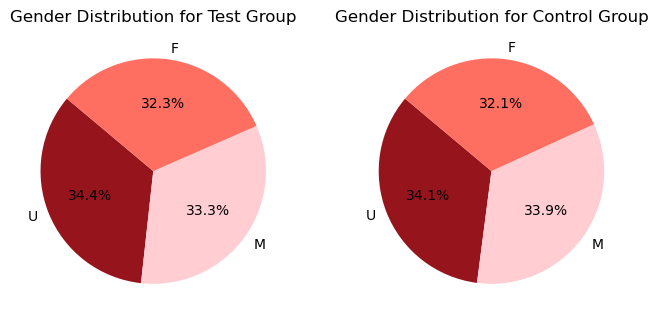

In [19]:
gender_ratios_test = df_final_demo_test['gendr'].value_counts(normalize=True)
gender_ratios_control = df_final_demo_control['gendr'].value_counts(normalize=True)

labels_test = gender_ratios_test.index
sizes_test = gender_ratios_test.values 
labels_control = gender_ratios_control.index
sizes_control = gender_ratios_control.values 

colors = ['#96151d', '#FFCDD2', '#FF6F61']  

#96151d (actual vanguard red), #FFCDD2(light red/pink), D50000 (tomato red), #FF6F61 (light salmon)

fig, axes = plt.subplots(1,2,figsize=(8,6))

axes[0].pie(sizes_test, labels=labels_test, colors=colors, autopct='%1.1f%%', startangle=140)
axes[1].pie(sizes_control, labels=labels_control, colors=colors, autopct='%1.1f%%', startangle=140)

axes[0].set_title('Gender Distribution for Test Group')
axes[1].set_title('Gender Distribution for Control Group')

plt.show()

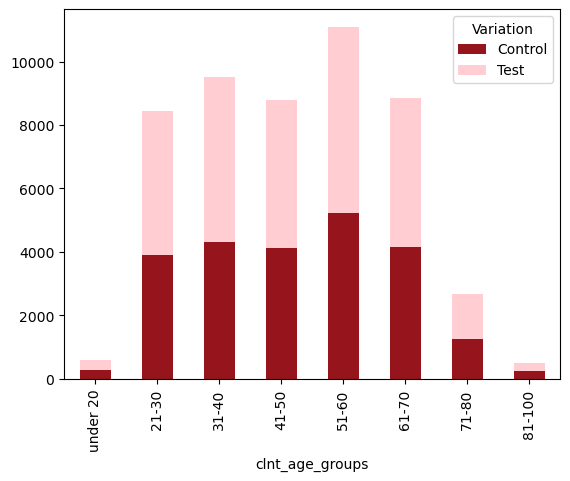

In [167]:

bins = [df_final_demo_client_id['clnt_age'].min(), 20, 30, 40, 50, 60, 70, 80 ,df_final_demo_client_id['clnt_age'].max()]
labels = ['under 20', '21-30', '31-40', '41-50','51-60','61-70','71-80','81-100' ]
df_final_demo_client_id['clnt_age_groups'] = pd.cut(df_final_demo_client_id['clnt_age'], bins=bins, labels=labels, include_lowest=True)

crosstab_age_group = pd.crosstab(df_final_demo_client_id['clnt_age_groups'], df_final_demo_client_id['Variation'])
crosstab_age_group

crosstab_age_group.plot(kind="bar",stacked=True, color=colors);


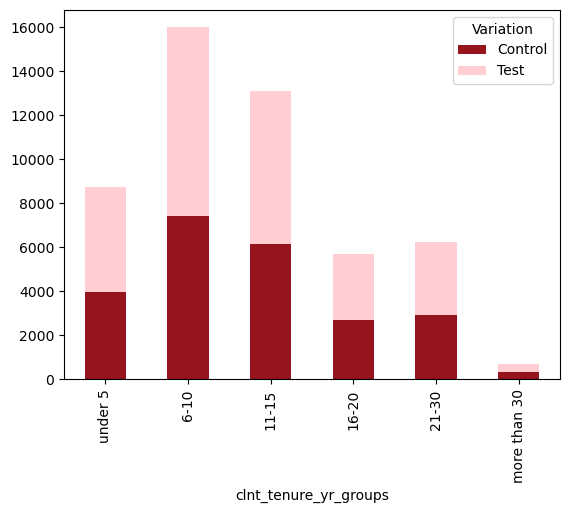

In [25]:
bins = [df_final_demo_client_id['clnt_tenure_yr'].min(), 5, 10, 15, 20, 30,df_final_demo_client_id['clnt_age'].max()]
labels = ['under 5', '6-10','11-15', '16-20', '21-30', 'more than 30']
df_final_demo_client_id['clnt_tenure_yr_groups'] = pd.cut(df_final_demo_client_id['clnt_tenure_yr'], bins=bins, labels=labels, include_lowest=True)

crosstab_tenure_group = pd.crosstab(df_final_demo_client_id['clnt_tenure_yr_groups'], df_final_demo_client_id['Variation'])
crosstab_tenure_group

crosstab_tenure_group.plot(kind="bar",stacked=True, color=colors);


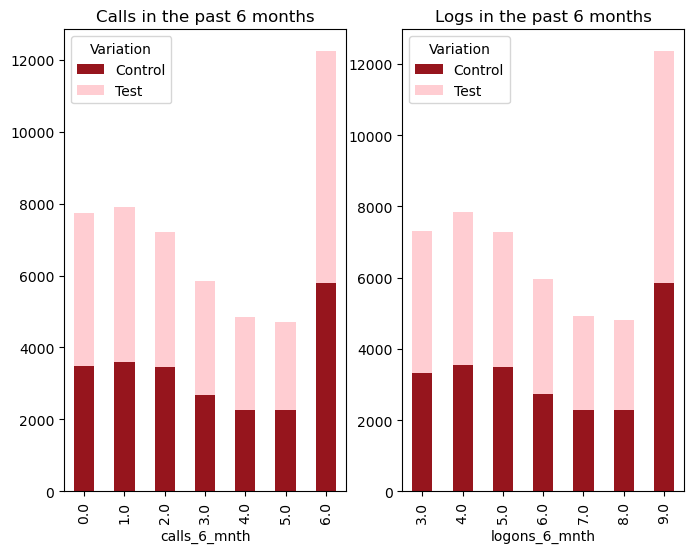

In [173]:
crosstab_calls_group = pd.crosstab(df_final_demo_client_id['calls_6_mnth'], df_final_demo_client_id['Variation'])
crosstab_calls_group


crosstab_logons_group = pd.crosstab(df_final_demo_client_id['logons_6_mnth'], df_final_demo_client_id['Variation'])
crosstab_logons_group


fig, axes = plt.subplots(1,2,figsize=(8,6))

crosstab_calls_group.plot(kind="bar",stacked=True, color=colors, ax=axes[0]);
crosstab_logons_group.plot(kind="bar",stacked=True, color=colors, ax=axes[1]);


axes[0].set_title('Calls in the past 6 months')
axes[1].set_title('Logs in the past 6 months')

plt.show()

In [182]:
#Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. 
#You should consider moving from a later step to an earlier one as an error.

df_final_test.sort_values('visit_id').sort_values('date_time')

df_final_test['error_step_rank'] = df_final_test.sort_values(['visit_id', 'date_time']).groupby('visit_id').cumcount() + 1

df_final_test.sort_values('visit_id').sort_values('date_time')

#supposed_order=['start','step_1','step_2','step_3','confirm']

#if error_step_rank == 1 & process_step == 'start' : good
#if error_step_rank == 2 & process_step == 'step_1' : good
#if error_step_rank == 3 & process_step == 'start' : went back
# -> Not optimal because someone can go back twice + if there is a step back once it will be wrong/will be a discrepancy for the rest of the order

#process_step_list=[]
#for i in error_step_rank grouped by visit_id:
#    add process_step value in process_step_list
#    if process_step value is already in process step list
#    then newcolumn 'error_step' = 1
#    else newcolumn 'error_step' = 0
# -> Not optimal as is because if there is a step forward after a step back it would be counted as an error

#dictionary_order={1:'start',2:'step_1',3:'step_2',4:'step_3',5:'confirm'}

#how many repetitive steps in one visit_id
#count(duplicate in process_step) / count(total_process_step)


df_final_test['error_step'] = df_final_test.duplicated(subset=['visit_id', 'process_step'],keep='first') 

df_final_test[df_final_test['visit_id'] == '706721307_85347845958_18583'] #2 errors (going back twice)

error_rates_test = (df_final_test['error_step'][df_final_test['error_step'] == True].count()) / df_final_test.process_step.count()

error_rates_test #for test group 0.22 when taking into account first occurence as duplicate and dividing by 2

error_rates_test #for test group 0.27 when taking into account only subsequent occurrences as duplicates

df_final_test[df_final_test['visit_id'] == '999971096_28827267783_236076'] #no error but one duplicate

df_final_test[df_final_test['visitor_id'] == '451664975_1722933822'] # no error but 2 visit_ids and one duplicate



/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_4959/2225120067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['error_step_rank'] = df_final_test.sort_values(['visit_id', 'date_time']).groupby('visit_id').cumcount() + 1
/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_4959/2225120067.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['error_step'] = df_final_test.duplicated(subset=['visit_id', 'process_step'],keep='first')


,client_id,Variation,visitor_id,visit_id,process_step,date_time,error_step_rank,error_step
142176,3561384,Test,451664975_1722933822,368621065_55513134501_466827,confirm,2017-04-25 13:22:14,5,False
142177,3561384,Test,451664975_1722933822,368621065_55513134501_466827,step_3,2017-04-25 13:19:42,4,False
142178,3561384,Test,451664975_1722933822,368621065_55513134501_466827,step_2,2017-04-25 13:19:20,3,False
142179,3561384,Test,451664975_1722933822,368621065_55513134501_466827,step_1,2017-04-25 13:18:59,2,False
142180,3561384,Test,451664975_1722933822,368621065_55513134501_466827,start,2017-04-25 13:18:45,1,False
142181,3561384,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2,False
142182,3561384,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,1,True


In [281]:
df_final_test['process_step_number'] = df_final_test['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4})

df_final_test['step_diff'] = df_final_test.groupby('visit_id')['process_step_number'].diff(-1)
df_final_test

df_final_test['step_diff'].value_counts()


#df_final_test[df_final_test['step_diff'] == -3 ]
#df_final_test[df_final_test['visit_id'] == '338086750_6664777018_225408']

count_visits_with_error_test1 = df_final_test[df_final_test['step_diff'] < 0]['step_diff'].count()
error_visits_rates_test1 = count_visits_with_error_test1 / df_final_test.visit_id.count()
error_visits_rates_test1

df_final_test[df_final_test['visit_id'] == '338086750_6664777018_225408']


/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_4959/3756811940.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final_test['process_step_number'] = df_final_test['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4})
/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_4959/3756811940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_test['process_step_number'] = df_final_test['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'co

,client_id,Variation,visitor_id,visit_id,process_step,date_time,error_step_rank,error_step,process_step_number,step_diff
126,2519971,Test,121616091_57089151674,338086750_6664777018_225408,step_2,2017-04-07 16:27:20,16,False,2,1.0
127,2519971,Test,121616091_57089151674,338086750_6664777018_225408,step_1,2017-04-07 16:27:12,15,False,1,1.0
128,2519971,Test,121616091_57089151674,338086750_6664777018_225408,start,2017-04-07 16:27:05,14,False,0,0.0
129,2519971,Test,121616091_57089151674,338086750_6664777018_225408,start,2017-04-07 16:25:35,13,True,0,-3.0
130,2519971,Test,121616091_57089151674,338086750_6664777018_225408,step_3,2017-04-07 15:43:57,12,False,3,1.0
131,2519971,Test,121616091_57089151674,338086750_6664777018_225408,step_2,2017-04-07 15:43:37,11,True,2,1.0
132,2519971,Test,121616091_57089151674,338086750_6664777018_225408,step_1,2017-04-07 15:43:28,10,True,1,1.0
133,2519971,Test,121616091_57089151674,338086750_6664777018_225408,start,2017-04-07 15:41:42,9,True,0,0.0
134,2519971,Test,121616091_57089151674,338086750_6664777018_225408,start,2017-04-07 15:39:23,8,True,0,-3.0
135,2519971,Test,121616091_57089151674,338086750_6664777018_225408,step_3,2017-04-07 15:32:50,7,True,3,1.0


In [277]:
def error_rate(df):
    """calculate the error rate based on process_step column"""
    df['process_step_number'] = df['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4})
    df['step_diff'] = df.groupby('visit_id')['process_step_number'].diff(-1)
    count_visits_with_error = df[df['step_diff'] < 0]['step_diff'].count()
    error_visits_rate = count_visits_with_error / df.visit_id.count()
    return error_visits_rate


error_rate(df_final_test), error_rate(df_final_control)

/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_4959/41212360.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['process_step_number'] = df['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4})
/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_4959/41212360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['process_step_number'] = df['process_step'].replace({'start': 0, 'step_1': 1,'step_2': 2,'step_3': 3,'confirm': 4})
/var/folders/84/2vk315td0qq3r5sg29wp

(0.09469937643030245, 0.07073650165200542)

In [190]:
#take process_step where error_rank is 1
#if process_step where error_rank+1 = process_step where error_rank is 1 -> good
#if process_step where error_rank+1 is different than process_step where error_rank is 1
#    Take value of process_step, match it with the key of the dictionnary (n)
#    if process_step where error_rank+1 = value of key n+1 -> good
#    if process_step where error_rank+1 = value of key n-1 -> ERROR

#dictionary_order={1:'start',2:'step_1',3:'step_2',4:'step_3',5:'confirm'}



#error rate based on visit_id -> One client during one visit doing at least one error is considered as 1 error for the calculation of the rate

visits_with_error_test = df_final_test.groupby('visit_id')['error_step'].any()
count_visits_with_error_test = visits_with_error_test.sum()

error_visits_rates_test = count_visits_with_error_test / df_final_test.visit_id.count()
error_visits_rates_test #0.095

visits_with_error_control = df_final_control.groupby('visit_id')['error_step'].any()
count_visits_with_error_control = visits_with_error_control.sum()
error_visits_rates_control = count_visits_with_error_control / df_final_control.visit_id.count()
error_visits_rates_control #0.092



0.09176646080495184

In [152]:
#df_final_control

df_final_control.sort_values('visit_id').sort_values('date_time')

df_final_control['error_step'] = df_final_control.duplicated(subset=['visit_id', 'process_step'], keep='first') 
df_final_control
df_final_control[df_final_control['visit_id'] == '949661017_22392791362_127391']

error_rates_control = (df_final_control['error_step'][df_final_control['error_step'] == True].count()) / df_final_control.process_step.count()

error_rates_control #for control group 0.20 when taking into account first occurence as duplicate and dividing by 2
error_rates_control #for control group 0.24 when taking into account only subsequent occurrences as duplicates

df_final_control[df_final_control['visit_id'] == '949661017_22392791362_127391']



/var/folders/84/2vk315td0qq3r5sg29wp35000000gn/T/ipykernel_4959/623071280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_control['error_step'] = df_final_control.duplicated(subset=['visit_id', 'process_step'], keep='first')


,client_id,Variation,visitor_id,visit_id,process_step,date_time,error_step
20,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,False
21,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,True
22,4033851,Control,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,True
23,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,False
24,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,False
25,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,False
26,4033851,Control,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,False
27,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,True
28,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,True
29,4033851,Control,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,True
